In [ ]:
from google.colab import files


uploaded = files.upload()

Saving data.csv to data (3).csv


In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(io.BytesIO(uploaded['data (3).csv']))

**Initial Data Structure Understanding**

In [ ]:
data.head()

,Year,Fertilizer_kg_per_ha,Arable_Land_ha,Crop_Production_Index,Food_Production_Index,Unnamed: 5
0,2000,3.17,3950000,51.5,52.06,NaN
1,2001,8.18,4060000,53.7,54.23,NaN
2,2002,4.08,4181000,59.7,60.05,NaN
3,2003,7.36,4185000,62.3,62.46,NaN
4,2004,13.41,4000000,64.9,64.52,NaN


In [ ]:
data.drop('Unnamed: 5', axis=1, inplace=True)

In [ ]:
data.head()

,Year,Fertilizer_kg_per_ha,Arable_Land_ha,Crop_Production_Index,Food_Production_Index
0,2000,3.17,3950000,51.5,52.06
1,2001,8.18,4060000,53.7,54.23
2,2002,4.08,4181000,59.7,60.05
3,2003,7.36,4185000,62.3,62.46
4,2004,13.41,4000000,64.9,64.52


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   23 non-null     int64  
 1   Fertilizer_kg_per_ha   23 non-null     float64
 2   Arable_Land_ha         23 non-null     int64  
 3   Crop_Production_Index  23 non-null     float64
 4   Food_Production_Index  23 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.0 KB


In [ ]:
data.describe()

,Year,Fertilizer_kg_per_ha,Arable_Land_ha,Crop_Production_Index,Food_Production_Index
count,23.00000,23.000000,2.300000e+01,23.000000,23.000000
mean,2011.00000,22.302174,4.478957e+06,88.769565,88.631304
std,6.78233,12.977777,2.883890e+05,25.343162,24.948775
min,2000.00000,3.170000,3.950000e+06,51.500000,52.060000
25%,2005.50000,14.010000,4.192500e+06,66.500000,66.500000
50%,2011.00000,20.880000,4.700000e+06,87.300000,87.280000
75%,2016.50000,32.300000,4.700000e+06,104.500000,104.675000
max,2022.00000,50.110000,4.720000e+06,137.100000,135.500000


In [ ]:
data.isnull().sum()

,0
Year,0
Fertilizer_kg_per_ha,0
Arable_Land_ha,0
Crop_Production_Index,0
Food_Production_Index,0


**Exploratory Data Analysis (EDA)**

So at this stage, I want to understand the relationships, trends overtime, and possible correlations between features.

Looks like there is a space character right after the column name 'Year ' Lets fix that.

In [ ]:
data.rename(columns={'Year ': 'Year'}, inplace=True)

**Fertilizer Usage Over Time**

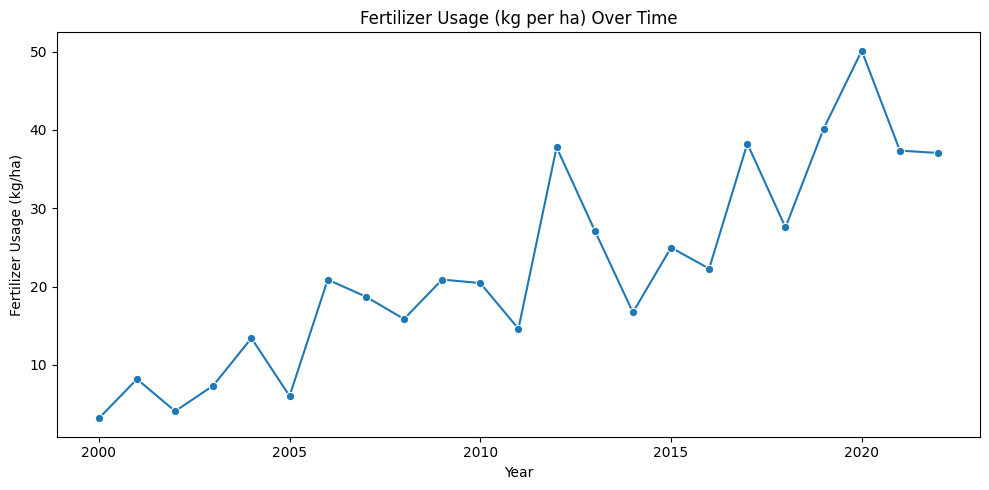

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='Year', y='Fertilizer_kg_per_ha', marker='o')
plt.title('Fertilizer Usage (kg per ha) Over Time')
plt.xlabel('Year')
plt.ylabel('Fertilizer Usage (kg/ha)')
plt.tight_layout()
plt.show()

**Arable Land Over Time**

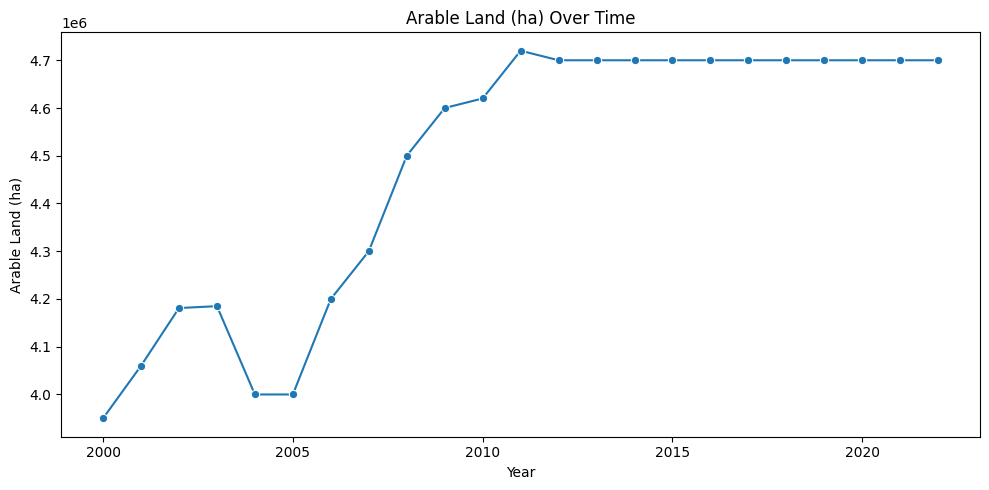

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='Year', y='Arable_Land_ha', marker='o')
plt.title('Arable Land (ha) Over Time')
plt.xlabel('Year')
plt.ylabel('Arable Land (ha)')
plt.tight_layout()
plt.show()

**Crop Production Index Over Time**

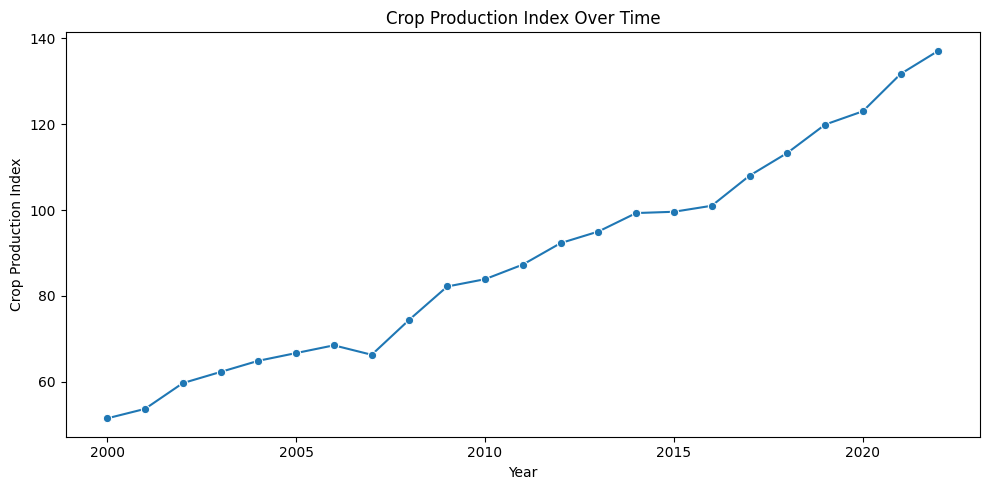

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='Year', y='Crop_Production_Index', marker='o')
plt.title('Crop Production Index Over Time')
plt.xlabel('Year')
plt.ylabel('Crop Production Index')
plt.tight_layout()
plt.show()

**Food Production Index Over Time**

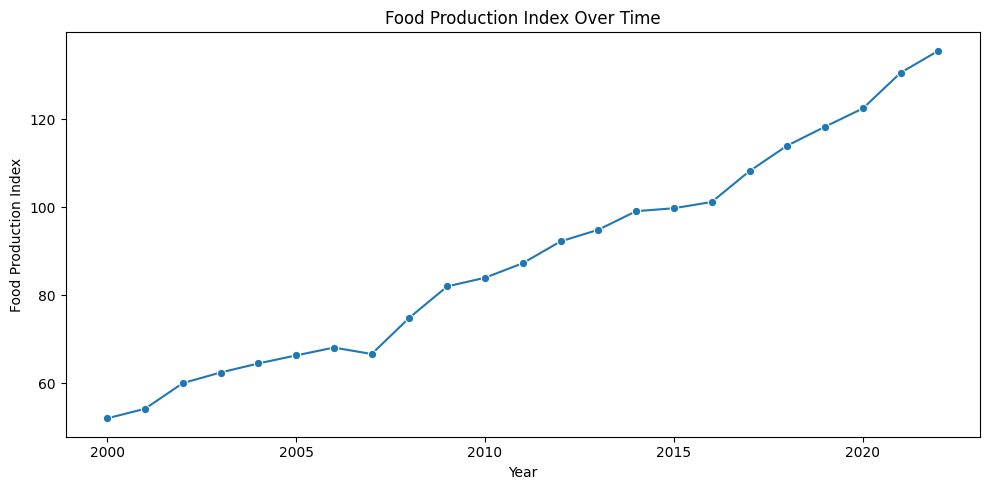

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='Year', y='Food_Production_Index', marker='o')
plt.title('Food Production Index Over Time')
plt.xlabel('Year')
plt.ylabel('Food Production Index')
plt.tight_layout()
plt.show()

**Correlation Matrix**

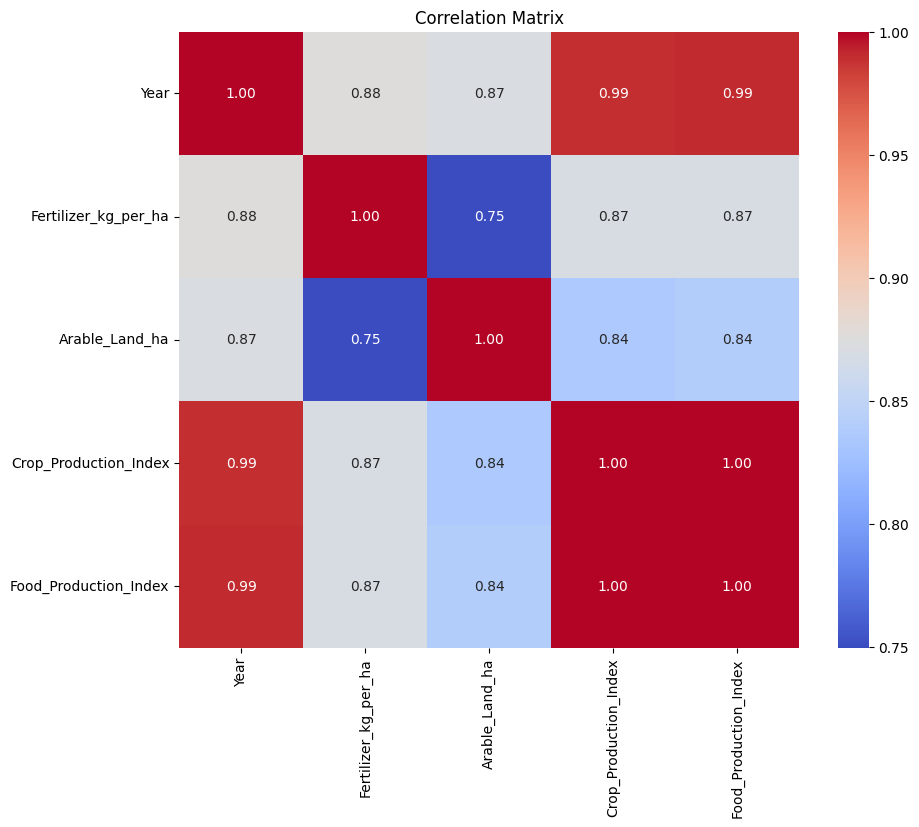

In [ ]:
corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

 Fertilizer use is strongly correlated with the production indexes, this is a great predictor.

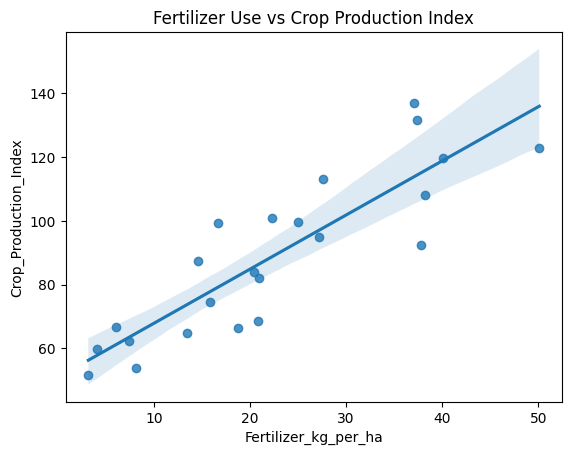

In [ ]:
sns.regplot(x='Fertilizer_kg_per_ha', y='Crop_Production_Index', data=data)
plt.title('Fertilizer Use vs Crop Production Index')
plt.show()

Now I want to drop the "Food_Production_Index".  It's highly correlated with "Crop_Production_Index", and keeping both may introduce multicollinearity.

In [ ]:
data.drop(columns=['Food_Production_Index'], inplace=True)

Now lets create a simple feature to replace it. "Crop_Index_per_Ha". It’s just dividing crop production by land. This is a strong signal that helps explain fertilizer demand.

In [ ]:
data['crop_Index_per_Ha'] = data['Crop_Production_Index'] / data['Arable_Land_ha']

In [ ]:
data.head()

,Year,Fertilizer_kg_per_ha,Arable_Land_ha,Crop_Production_Index,crop_Index_per_Ha
0,2000,3.17,3950000,51.5,0.000013
1,2001,8.18,4060000,53.7,0.000013
2,2002,4.08,4181000,59.7,0.000014
3,2003,7.36,4185000,62.3,0.000015
4,2004,13.41,4000000,64.9,0.000016


**Feature Scaling**

I am applying feature scaling to normalize the values of our variables so that features with larger numerical ranges, like arable land, don't dominate those with smaller ranges, like fertilizer usage, which helps the model learn more effectively. Because "Fertilizer_kg_per_ha" is the tartget we want to predict, so we want scale it down.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

features_to_scale = ['Year', 'Arable_Land_ha', 'Crop_Production_Index', 'crop_Index_per_Ha']

data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

In [ ]:
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
data.head()

,Year,Fertilizer_kg_per_ha,Arable_Land_ha,Crop_Production_Index,crop_Index_per_Ha
0,0.000000,3.17,0.000000,0.000000,0.000000
1,0.045455,8.18,0.142857,0.025701,0.011693
2,0.090909,4.08,0.300000,0.095794,0.076921
3,0.136364,7.36,0.305195,0.126168,0.114586
4,0.181818,13.41,0.064935,0.156542,0.197556


**Train-Test Split**

We split the dataset to evaluate how well our model generalizes to unseen data. The model learns from the training data, and we test its performance using the test data to prevent overfitting.

Spliting the data into X (features) and y (target), then spliting it again into training and testing sets.

Since we're predicting Fertilizer_kg_per_ha, this will be your target (y). The rest of the columns (except Fertilizer_kg_per_ha) will be your features (X).

In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop(columns=['Fertilizer_kg_per_ha'])
y = data['Fertilizer_kg_per_ha']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Model Selection**

I am selecting multiple regression models; Linear Regression for a baseline, Ridge Regression to prevent overfitting due to feature correlation, and Random Forest Regressor to capture any non-linear relationships. This is to compare their performance and choose the best model for predicting fertilizer demand.

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = lr_model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Evaluation Metrics:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Linear Regression Evaluation Metrics:
MAE: 3.2457
MSE: 13.5696
RMSE: 3.6837
R² Score: 0.8967


**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf_pred = rf_model.predict(x_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Evaluation Metrics:")
print(f"MAE: {rf_mae:.4f}")
print(f"MSE: {rf_mse:.4f}")
print(f"RMSE: {rf_rmse:.4f}")
print(f"R² Score: {rf_r2:.4f}")

Random Forest Evaluation Metrics:
MAE: 5.6096
MSE: 50.5099
RMSE: 7.1070
R² Score: 0.6156


**Support Vector Regressor (SVR)**

In [ ]:
from sklearn.svm import SVR

svr_model = SVR()

svr_model.fit(x_train, y_train)

SVR()

In [ ]:
svr_pred = svr_model.predict(x_test)

svr_mae = mean_absolute_error(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, svr_pred)

print("SVR Evaluation Metrics:")
print(f"MAE: {svr_mae:.4f}")
print(f"MSE: {svr_mse:.4f}")
print(f"RMSE: {svr_rmse:.4f}")
print(f"R² Score: {svr_r2:.4f}")

SVR Evaluation Metrics:
MAE: 7.2633
MSE: 90.6425
RMSE: 9.5206
R² Score: 0.3103


Linear Regression clearly outperforms the others across all evaluation metrics.

SVR performs the worst, likely due to the small dataset and the lack of non-linear complexity in the relationships.

Random Forest, while more flexible, may be overfitting or simply unnecessary given the linear nature of your data.

Since we've selected Linear Regression the best-performing model, the next step is to visualize and validate the results. This helps to understand how well the model fits the data. Spot any obvious patterns in the residuals (errors). Communicate findings more clearly in reports or presentations

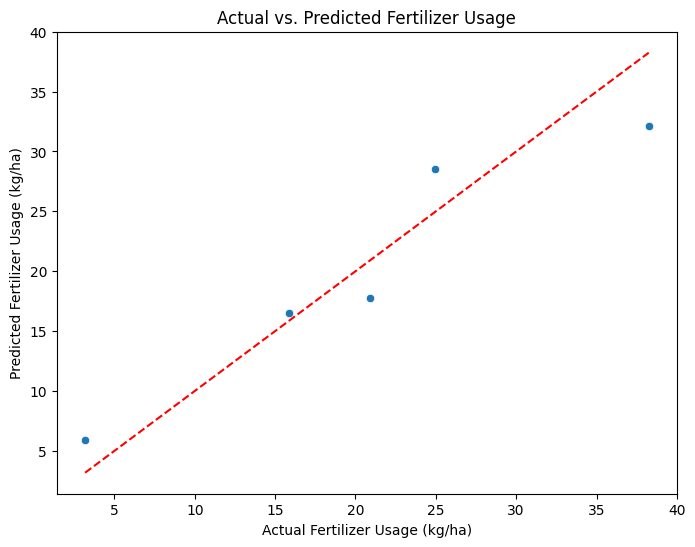

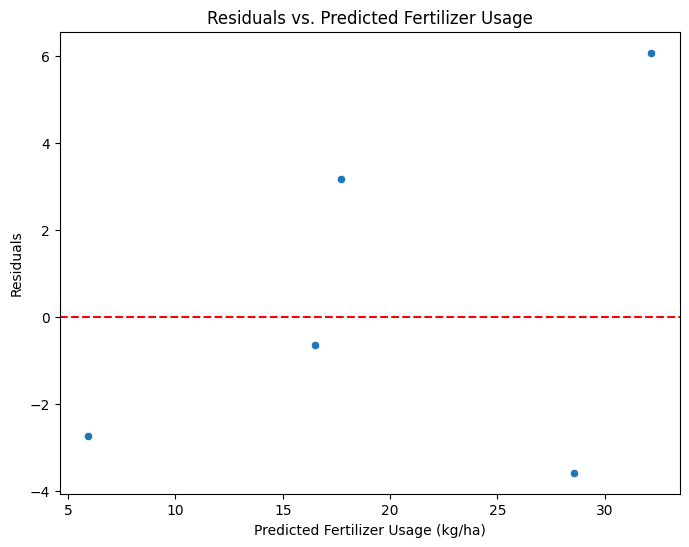

In [ ]:
y_pred = lr_model.predict(x_test)

# 1. Actual vs Predicted Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Fertilizer Usage (kg/ha)')
plt.ylabel('Predicted Fertilizer Usage (kg/ha)')
plt.title('Actual vs. Predicted Fertilizer Usage')
plt.show()

# 2. Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel('Predicted Fertilizer Usage (kg/ha)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Fertilizer Usage')
plt.show()

Saving & Deployment

I decided against Hyperparameter Tuning, complex cross-validation and Feature Importance & Interpretation due to dataset size and project scope.

In [ ]:
import joblib


joblib.dump(lr_model, 'fertilizer_predictor_model.pkl')

['fertilizer_predictor_model.pkl']

In [ ]:
from google.colab import files
files.download('fertilizer_predictor_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>